In [1]:
import numpy as np
import re
from itertools import product, permutations, combinations, cycle
from collections import Counter, deque, defaultdict, OrderedDict
import networkx as nx
import string
import matplotlib.pyplot as plt

%matplotlib inline

In [86]:
# input
problemnumber = '11'
fn = f'../{problemnumber}/{problemnumber}.txt'
# fn = f'../{problemnumber}/{problemnumber}t.txt'


# ms = []
with open(fn) as fh:
    ms = fh.read().split('\n\n')

In [87]:
class Monkey():
    def __init__(self, s):
        self.mnum = None
        self.items = []
        self.op_vars = None
        self.test_vars = None
        self.true_m = None
        self.false_m = None
        self.read_input(s)
        self.inspect_num = 0
        
    def read_input(self, s):
        ss = s.split('\n')
        self.mnum = int(ss[0].split()[1][:-1])
        
        for x in ss[1].split()[2:]:
            self.items.append(int(x.split(',')[0]))
        
        op = ss[2].split()[-2:]
        self.op_vars = op
        test_num = int(ss[3].split()[-1])
        self.test_vars = test_num
        self.true_m = int(ss[4].split()[-1])
        self.false_m = int(ss[5].split()[-1])
    
    def op_func(self, v):
        if self.op_vars[0] == '*':
            if self.op_vars[1] == 'old':
                return v * v
            else:
                return v * int(self.op_vars[1])
        if self.op_vars[0] == '+':
            return v + int(self.op_vars[1])
    
    def test_func(self, v):
        return v%self.test_vars == 0
        
def round(mnum, monkeys):
    m = monkeys[mnum]
    if len(m.items)==0:
        mnum += 1
#         print('TRUE', mnum)
        return mnum
    
    m.inspect_num += 1
    x = m.items.pop(0)
#     print(m.mnum, x)
    x = m.op_func(x)
#     x = x // 3
#     print(x)
    if m.test_func(x):
        monkeys[m.true_m].items.append(x)
    else:
        monkeys[m.false_m].items.append(x)
    
    return mnum



def mod_worry(v, mod_val=223092870):
    return v % mod_val



def roundB(monkeys):
    new_lists = {x:[] for x in range(len(monkeys))}
    for mnum, m in monkeys.items():
        eval_num = len(m.items)
        m.inspect_num += eval_num
        for _ in range(eval_num):
            v = m.items.pop(0)
            m0 = mnum
            m1 = mnum
            while True:
                m0 = m1
                v = monkeys[m0].op_func(v)
                if monkeys[m0].test_func(v):
                    m1 = monkeys[m0].true_m
                else:
                    m1 = monkeys[m0].false_m
                if m1 < m0:
                    new_lists[m1].append(mod_worry(v))
                    break
                monkeys[m1].inspect_num += 1
    for m, items in new_lists.items():
        monkeys[m].items = items

In [88]:
3 * 13 * 2 * 11 * 5 * 17 * 19 * 7 * 23

223092870

In [89]:
monkeys = {}
for ind, m in enumerate(ms):
    monkeys[ind] = Monkey(m)
#     print(ind)

In [90]:
rounds = []
insp_ns = {x:[] for x in range(len(monkeys))}

for _ in range(10000):
    roundB(monkeys)
    for n, m in monkeys.items():
        insp_ns[n].append(m.inspect_num)

In [91]:
for m in monkeys.values():
    print(m.inspect_num)

171832
12942
167042
12599
167043
172863
12961
160272


In [92]:
171832 * 172863

29703395016

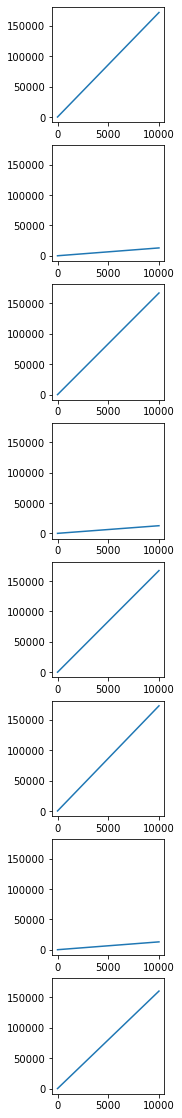

In [93]:
fig, axs = plt.subplots(nrows=len(monkeys), figsize=[2, 20], sharey=True)
for ind, ax in enumerate(axs):
    ax.plot(insp_ns[ind])
# plt.plot(insp_ns[3])

In [238]:
rounds = []
insp_ns = {x:[] for x in range(len(monkeys))}
for _ in range(30):
    mnum = 0
    while mnum < len(monkeys):
        mnum = round(mnum, monkeys)
#     print()
#     ins_n = []
    for n, m in monkeys.items():
        insp_ns[n].append(m.inspect_num)

In [241]:
for n, vals in insp_ns.items():
    print(f"{n}: {max(vals)}")

0: 486
1: 99
2: 423
3: 95
4: 427
5: 501
6: 117
7: 413


In [ ]:
# 0 and 4

In [246]:
insp_ns[4]

[2,
 8,
 16,
 20,
 36,
 41,
 58,
 70,
 84,
 99,
 114,
 130,
 144,
 161,
 175,
 193,
 208,
 227,
 242,
 259,
 274,
 292,
 308,
 327,
 342,
 359,
 374,
 392,
 408,
 427]

In [243]:
86-67

19

In [244]:
67-51

16

In [245]:
51-31

20